# CSE 256: Statistical NLP UCSD Assignment 2
## Exploring Word Vectors (12.5 points + 1 bonus point)
### <font color='blue'> Due 11:59pm, Monday April 18, 2022 </font>


Before you start, make sure you read the README.txt in the same directory as this notebook.


**Notes:** Please make sure to save the notebook as you go along. Submission Instructions are located at the bottom of the notebook.

In [ ]:
# All Import Statements Defined Here
# Note: Do not add to this list.
# ----------------

import sys
assert sys.version_info[0]==3
assert sys.version_info[1] >= 5

from gensim.models import KeyedVectors
from gensim.test.utils import datapath
import pprint
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
import nltk
nltk.download('reuters')
from nltk.corpus import reuters
import numpy as np
import random
import scipy as sp
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

START_TOKEN = '<START>'
END_TOKEN = '<END>'

np.random.seed(0)
random.seed(0)
# ----------------

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


## Word Vectors

Word Vectors are often used as a fundamental component for downstream NLP tasks, e.g. question answering, text generation, translation, etc., so it is important to build some intuitions as to their strengths and weaknesses. Here, you will explore word vectors derived from *Word2Vec*. 

**Note on Terminology:** The terms "word vectors" and "word embeddings" are often used interchangeably. The term "embedding" refers to the fact that we are encoding aspects of a word's meaning in a lower dimensional space. As [Wikipedia](https://en.wikipedia.org/wiki/Word_embedding) states, "*conceptually it involves a mathematical embedding from a space with one dimension per word to a continuous vector space with a much lower dimension*".

## Word Vectors 

---



We shall explore the embeddings produced by word2vec. Please revisit the class notes and lecture slides for more details on the word2vec algorithm. Paper 1 review due May 4th, involves reading the  [word2vec  paper](https://proceedings.neurips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf),  reading it now might help you with this assignment.

Run the following cells to load the word2vec vectors into memory. **Note**: If this is your first time to run these cells, i.e. download the embedding model, it will take a couple minutes to run. If you've run these cells before, rerunning them will load the model without redownloading it, which will take about 1 to 2 minutes. In *Colab*, the embeddings are downloaded to the server everytime you restart the notebook). For this reason, you may prefer to work on your local machine where the download only happens once.

In [ ]:
def load_embedding_model():
    """ Load Word2Vec Vectors
        Return:
            wv_from_bin: All the embeddings
    """
    import gensim.downloader as api
    wv_from_bin = api.load("word2vec-google-news-300")

    print("Loaded vocab size %i" % len(wv_from_bin.vocab.keys()))
    return wv_from_bin

In [ ]:
# -----------------------------------
# Run Cell to Load Word Vectors
# Note: This will take a couple minutes
# -----------------------------------
wv_from_bin = load_embedding_model()

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Loaded vocab size 3000000


#### Note: If you are receiving a "reset by peer" error, rerun the cell to restart the download. 


### Plot function
Let's define a plot function that reduces the vectors from 300-dimensions to 2-dimensions, and visualises them.

In [ ]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.key_to_index.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(10,10))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

### Question 1: Word2vec Plot Analysis [written] (2 points)

Run the cell below to plot the 2D GloVe embeddings for `['barrels', 'bpd', 'ecuador', 'energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'iraq']`.

What clusters together in 2-dimensional embedding space? What doesn't cluster together that you think should have?

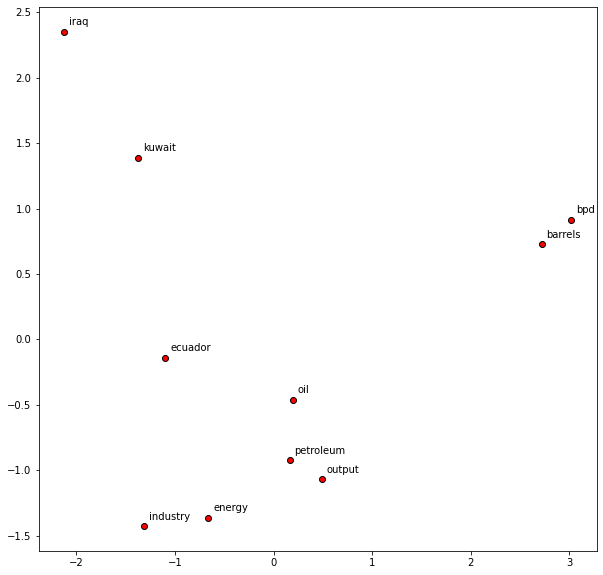

In [ ]:
words = ['barrels', 'bpd', 'ecuador', 'energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'iraq']
display_pca_scatterplot(wv_from_bin, words)

#### <font color="red">Write your answer here.</font>
In my opinion, there are three clusters. 
<br>However, I think ecuador, kuwait and iraq should be a cluster as they are all countries. bpd, oil and pertroleum should be a cluster as well since bqd is Barrel per day used to describe the oil output.</br>



### Cosine Similarity
Now that we have word vectors, we need a way to quantify the similarity between individual words, according to these vectors. One such metric is cosine-similarity. We will be using this to find words that are "close" and "far" from one another.

The [Cosine Similarity](https://en.wikipedia.org/wiki/Cosine_similarity) $s$ between two vectors $p$ and $q$ is defined as:

$$s = \frac{p \cdot q}{||p|| ||q||}, \textrm{ where } s \in [-1, 1] $$ 

### Question 2: Words with Multiple Meanings (2 points) [code + written] 
Polysemes and homonyms are words that have more than one meaning (see this [wiki page](https://en.wikipedia.org/wiki/Polysemy) to learn more about the difference between polysemes and homonyms ). Find a word with *at least two different meanings* such that the top-10 most similar words (according to cosine similarity) contain related words from *both* meanings. For example, "leaves" has both "go_away" and "a_structure_of_a_plant" meaning in the top 10, and "rock" has both "music" and "stone". You will probably need to try several polysemous or homonymic words before you find one. 

Please state the word you discover and the multiple meanings that occur in the top 10. Why do you think many of the polysemous or homonymic words you tried didn't work (i.e. the top-10 most similar words only contain **one** of the meanings of the words)?

**Note**: You should use the `wv_from_bin.most_similar(word)` function to get the top 10 similar words. This function ranks all other words in the vocabulary with respect to their cosine similarity to the given word. For further assistance, please check the __[GenSim documentation](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.FastTextKeyedVectors.most_similar)__.

In [ ]:
    # ------------------
    # Write your implementation here.
    wv_from_bin.most_similar(positive=['trunk'], topn=10)

    # ------------------

[('glove_compartment', 0.5936945676803589),
 ('trunks', 0.5714457631111145),
 ('floorboard', 0.5641743540763855),
 ('spare_tire', 0.5533804893493652),
 ('Deja_Adair_bodies', 0.5393577814102173),
 ("driver's_side_door", 0.5388186573982239),
 ('maroon_Toyota_Camry', 0.5327662825584412),
 ('nightstand_drawer', 0.5309293270111084),
 ('undercarriage', 0.5295648574829102),
 ('passenger_footwell', 0.5287629961967468)]

#### <font color="red">Write your answer here.</font>
I found trunk as the answer. The first meaning of it is a large strong box with a lid used for storing or transporting clothes, books, etc. Therefore, nightstand_drawer is shown on the list. And the second meaning of trunk is the space at the back of a car that you put bags, cases, etc. Therefore, driver's_side_door is shown on the list
<br> 
The reason why many of the polysemous did not work is that one meaning of the word has the majority, such as country. I think it has another meaning as a genre in music, but many countries' names are shown without relaing to music.
<br>
Another reason is that the Captialization distinguishes the words including Turkey and turkey, one stands for a country and another one stands for an animal.

### Question 3: Analogies with Word Vectors [written] (2 points)
Word vectors have been shown to *sometimes* exhibit the ability to solve analogies. 

As an example, for the analogy "man : king :: woman : x" (read: man is to king as woman is to x), what is x?

In the cell below, we show you how to use word vectors to find x using the `most_similar` function from the __[GenSim documentation](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.most_similar)__. The function finds words that are most similar to the words in the `positive` list and most dissimilar from the words in the `negative` list (while omitting the input words, which are often the most similar; see [this paper](https://www.aclweb.org/anthology/N18-2039.pdf)). The answer to the analogy will have the highest cosine similarity (largest returned numerical value).

In [ ]:
# Run this cell to answer the analogy -- man : king :: woman : x
pprint.pprint(wv_from_bin.most_similar(positive=['woman', 'king'], negative=['man']))

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]


Let $m$, $k$, $w$, and $x$ denote the word vectors for `man`, `king`, `woman`, and the answer, respectively. Using **only** vectors $m$, $k$, $w$, and the vector arithmetic operators $+$ and $-$ in your answer, what is the expression in which we are maximizing cosine similarity with $x$?

#### <font color="red">Write your answer here.</font>
x = k - m + w

### Question 4: Finding Analogies [code + written]  (1 point)
Find an example of analogy that holds according to these vectors (i.e. the intended word is ranked top). In your solution please state the full analogy in the form x:y :: a:b. If you believe the analogy you came up might not be obvious to the TAs, explain why the analogy holds in one or two sentences.

**Note**: You may have to try many analogies to find one that works!

In [ ]:
    # ------------------
    # Write your implementation here.
    pprint.pprint(wv_from_bin.most_similar(positive=['Japan', 'Beijing'], negative=['China']))

    # ------------------

[('Tokyo', 0.8115593194961548),
 ('Osaka', 0.6796455383300781),
 ('Seoul', 0.6568831205368042),
 ('Japanese', 0.6475988030433655),
 ('Nagoya', 0.6425851583480835),
 ('Maebashi', 0.6409165859222412),
 ('Yokohama', 0.626289427280426),
 ('Fukuoka', 0.6085069179534912),
 ('Osaka_Japan', 0.606758713722229),
 ('Sapporo', 0.6054472923278809)]


#### <font color="red">Write your answer here.</font>
China : Beijing :: Japan : Tokyo

### Question 5: Incorrect Analogy [code + written] (2 point)
Find an example of analogy that does *not* hold according to these vectors. In your solution, state the intended analogy in the form x:y :: a:b, and state the (incorrect) value of b according to the word vectors.

In [ ]:
    # ------------------
    # Write your implementation here.
    pprint.pprint(wv_from_bin.most_similar(positive=['winter', 'swim'], negative=['summer']))

    # ------------------

[('swimming', 0.682741641998291),
 ('swims', 0.6299254298210144),
 ('swimmers', 0.6152995228767395),
 ('swum', 0.5975209474563599),
 ('swam', 0.5901205539703369),
 ('Swimming', 0.5661748647689819),
 ('swimmer', 0.5531409978866577),
 ('Swim', 0.5291240811347961),
 ('doggy_paddle', 0.514002799987793),
 ('paddling', 0.49313318729400635)]


#### <font color="red">Write your answer here.</font>
Intended summer : swim :: winter : ski

Incorrect summer : swim :: winter : swimming

### Question 6: Guided Analysis of Bias in Word Vectors [written] (2 point)

It's important to be cognizant of the biases (gender, race, sexual orientation etc.) implicit in our word embeddings. Bias can be dangerous because it can reinforce stereotypes through applications that employ these models.

Run the cell below, to examine (a) which terms are most similar to "woman" and "worker" and most dissimilar to "man", and (b) which terms are most similar to "man" and "worker" and most dissimilar to "woman". Point out the difference between the list of female-associated words and the list of male-associated words, and explain how it is reflecting gender bias.

In [ ]:
# Run this cell
# Here `positive` indicates the list of words to be similar to and `negative` indicates the list of words to be
# most dissimilar from.
pprint.pprint(wv_from_bin.most_similar(positive=['woman', 'worker'], negative=['man']))
print()
pprint.pprint(wv_from_bin.most_similar(positive=['man', 'worker'], negative=['woman']))

[('workers', 0.6582455635070801),
 ('employee', 0.5805293321609497),
 ('nurse', 0.5249921679496765),
 ('receptionist', 0.5142490267753601),
 ('migrant_worker', 0.5001609325408936),
 ('Worker', 0.4979269802570343),
 ('housewife', 0.48609834909439087),
 ('registered_nurse', 0.4846190810203552),
 ('laborer', 0.48437267541885376),
 ('coworker', 0.48212406039237976)]

[('workers', 0.5590360164642334),
 ('laborer', 0.54481041431427),
 ('foreman', 0.5192232131958008),
 ('Worker', 0.5161596536636353),
 ('employee', 0.5094279050827026),
 ('electrician', 0.49481213092803955),
 ('janitor', 0.48718899488449097),
 ('bricklayer', 0.4825313091278076),
 ('carpenter', 0.47498998045921326),
 ('workman', 0.4642517566680908)]


#### <font color="red">Write your answer here.</font>
As showing in the output, we got nurse, receptionist, migrant_worker, housewife, registered_nurse, coworker for women. These jobs like nurse, receptionist and housewife are jobs for women as they can do better than men.
<br>
As for men, we got foreman, electrician, janitor, bricklayer, carpenter, workman, involving physical activity, which should be done by men. The difference in jobs indicating the bias of gender in jobs.

### Question 7: Independent Analysis of Bias in Word Vectors [code + written]  ( 1.5 point)

Use the `most_similar` function to find another case where some bias is exhibited by the vectors. Please briefly explain the example of bias that you discover.

In [ ]:
    # ------------------
    # Write your implementation here.
    pprint.pprint(wv_from_bin.most_similar(positive=['human', 'food'], negative=['animal']))
    print()
    pprint.pprint(wv_from_bin.most_similar(positive=['animal', 'food'], negative=['human']))

    # ------------------

[('foodstuffs', 0.44971492886543274),
 ('foodstuff', 0.4449312388896942),
 ('nutritious_wholesome', 0.4431554675102234),
 ('sustenance', 0.4387950301170349),
 ('meals', 0.4371641278266907),
 ('basic_necessities', 0.4278228282928467),
 ('staple_foods', 0.4267752170562744),
 ('foods', 0.42170023918151855),
 ('Food', 0.4215978980064392),
 ('necessities', 0.410751074552536)]

[('foods', 0.5348324775695801),
 ('pet', 0.5268514752388),
 ('meat', 0.5024101734161377),
 ('animals', 0.49990469217300415),
 ('Food', 0.4994952082633972),
 ('livestock', 0.4868749976158142),
 ('catfood', 0.4734811782836914),
 ('dog', 0.4721004068851471),
 ('animal_welfare', 0.47053539752960205),
 ('seafood', 0.46918267011642456)]


#### <font color="red">Write your answer here.</font>
I choose human and animal as two category to check their bias about food.
<br>
As showing above, the difference in human is the words including meals, basic_necessities and staple_foods which are words describing human food.
<br>
However, in animal food, we can see livestock, catfood and animal_welfare, describing food for different animals. These differences show the bias.

### Question 8: Thinking About Bias [written] (Bonus: 1 point)

Give one explanation of how bias gets into the word vectors. What is an experiment that you could do to test for or to measure this source of bias?

#### <font color="red">Write your answer here.</font>
1. Explanation that bias exists in word vectors: These biases are also reflected in the training corpus. For example, women will appear more frequently with other words, so they are learned through skip-gram, cbow, glove, etc. The distance between word vectors will reflect this co-occurrence pattern. 
2. How to test: directly to count the co-occurence between words in the corpus, such as whether the frequency of woman and related workers appearing together is higher than that of man and related workers.

# <font color="blue"> Submission Instructions</font>

1. Click the Save button at the top of the Jupyter Notebook.
2. Select Cell -> All Output -> Clear. This will clear all the outputs from all cells (but will keep the content of all cells). 
2. Select Cell -> Run All. This will run all the cells in order, and will take several minutes.
3. Once you've rerun everything, select File -> Download as -> PDF via LaTeX (If you have trouble using "PDF via LaTex", you can also save the webpage as pdf. <font color='blue'> Make sure all your solutions especially the coding parts are displayed in the pdf</font>, it's okay if the provided codes get cut off because lines are not wrapped in code cells).
4. Look at the PDF file and make sure all your solutions are there, displayed correctly. The PDF is the only thing your graders will see!
5. Submit your PDF on Gradescope.


#### <font color="blue"> Acknowledgements</font>
This assignment is based on an assignment developed by Chris Manning